# PREPROCESSING DATA

In [3]:
%load_ext autoreload
%autoreload 2
import json
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display, HTML
from reutilizabile.common_imports import *
from reutilizabile.missing_freq_unique import *
from reutilizabile.feature_engineering import *
from reutilizabile.plots import *

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv("data/job_description.csv")

## INFO,DESCRIBE,HEAD

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408970 entries, 0 to 1408969
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Experience        1408970 non-null  object
 1   Qualifications    1408970 non-null  object
 2   Salary Range      1408970 non-null  object
 3   location          1408970 non-null  object
 4   Country           1408970 non-null  object
 5   Work Type         1408970 non-null  object
 6   Company Size      1408970 non-null  int64 
 7   Job Posting Date  1408970 non-null  object
 8   Job Title         1408970 non-null  object
 9   Role              1408970 non-null  object
 10  Job Portal        1408970 non-null  object
 11  Job Description   1408970 non-null  object
 12  Benefits          1408970 non-null  object
 13  skills            1408970 non-null  object
 14  Responsibilities  1408970 non-null  object
 15  Company           1408970 non-null  object
dtypes: int64(1), objec

In [7]:
df.describe()

,Company Size
count,1.408970e+06
mean,7.370942e+04
std,3.529821e+04
min,1.264600e+04
25%,4.313000e+04
50%,7.363400e+04
75%,1.043028e+05
max,1.348340e+05


In [8]:
df.head()

,Experience,Qualifications,Salary Range,location,Country,Work Type,Company Size,Job Posting Date,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company
0,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,26801,2022-04-24,Digital Marketing Specialist,Social Media Manager,Snagajob,"Social Media Managers oversee an organizations social media presence. They create and schedule content, engage with followers, and analyze social media metrics to drive brand awareness and engagement.","{'Flexible Spending Accounts (FSAs), Relocation Assistance, Legal Assistance, Employee Recognition Programs, Financial Counseling'}","Social media platforms (e.g., Facebook, Twitter, Instagram) Content creation and scheduling Social media analytics and insights Community engagement Paid social advertising","Manage and grow social media accounts, create engaging content, and interact with the online community. Develop social media content calendars and strategies. Monitor social media trends and engagement metrics.",Icahn Enterprises
1,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,100340,2022-12-19,Web Developer,Frontend Web Developer,Idealist,"Frontend Web Developers design and implement user interfaces for websites, ensuring they are visually appealing and user-friendly. They collaborate with designers and backend developers to create seamless web experiences for users.","{'Health Insurance, Retirement Plans, Paid Time Off (PTO), Flexible Work Arrangements, Employee Assistance Programs (EAP)'}","HTML, CSS, JavaScript Frontend frameworks (e.g., React, Angular) User experience (UX)","Design and code user interfaces for websites, ensuring a seamless and visually appealing user experience. Collaborate with UX designers to optimize user journeys. Ensure cross-browser compatibility and responsive design.",PNC Financial Services Group
2,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,84525,2022-09-14,Operations Manager,Quality Control Manager,Jobs2Careers,"Quality Control Managers establish and enforce quality standards within an organization. They develop quality control processes, perform inspections, and implement corrective actions to maintain product or service quality.","{'Legal Assistance, Bonuses and Incentive Programs, Wellness Programs, Employee Discounts, Retirement Plans'}","Quality control processes and methodologies Statistical process control (SPC) Root cause analysis and corrective action Quality management systems (e.g., ISO 9001) Compliance and regulatory knowledge",Establish and enforce quality control standards and procedures. Conduct quality audits and inspections. Collaborate with production teams to address quality issues and implement improvements.,United Services Automobile Assn.
3,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,129896,2023-02-25,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, and maintain wireless network solutions. They optimize wireless connectivity, troubleshoot issues, and ensure reliable and secure wireless communications.","{'Transportation Benefits, Professional Development, Bonuses and Incentive Programs, Profit-Sharing, Employee Discounts'}",Wireless network design and architecture Wi-Fi standards and protocols RF (Radio Frequency) planning and optimization Wireless security protocols Troubleshooting wireless network issues,"Design, configure, and optimize wireless networks, ensuring reliable and secure wireless connectivity. Troubleshoot wireless network issues. Plan and implement wireless network upgrades.",Hess
4,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,53944,2022-10-11,Event Manager,Conference Manager,Jobs2Careers,"A Conference Manager coordinates and manages conferences, meetings, and events. They plan logistics, handle budgeting, liaise with vendors, and ensure the smooth execution of events, catering to the needs and expectations of attendees.","{'Flexible Spending Accoun

## Missing, Frequent, Unique

In [10]:
missing = missing_data(df)
print(missing)

        Experience Qualifications Salary Range location Country Work Type  \
Total            0              0            0        0       0         0   
Percent        0.0            0.0          0.0      0.0     0.0       0.0   
Types       object         object       object   object  object    object   

        Company Size Job Posting Date Job Title    Role Job Portal  \
Total              0                0         0       0          0   
Percent          0.0              0.0       0.0     0.0        0.0   
Types          int64           object    object  object     object   

        Job Description Benefits  skills Responsibilities Company  
Total                 0        0       0                0       0  
Percent             0.0      0.0     0.0              0.0     0.0  
Types            object   object  object           object  object  


In [11]:
frequent_values = most_frequent_values(df)
print(frequent_values)

                      Experience Qualifications Salary Range location  \
Total                    1408970        1408970      1408970  1408970   
Most frequent item  5 to 8 Years            BBA    $62K-$82K    Seoul   
Frequence                  29760         141518         2673    13203   
Percent from total         2.112         10.044         0.19    0.937   

                    Country  Work Type Company Size Job Posting Date  \
Total               1408970    1408970      1408970          1408970   
Most frequent item  Somalia  Part-Time        83541       2021-11-14   
Frequence              6713     282758           28             2081   
Percent from total    0.476     20.068        0.002            0.148   

                         Job Title                  Role Job Portal  \
Total                      1408970               1408970    1408970   
Most frequent item  UX/UI Designer  Interaction Designer   FlexJobs   
Frequence                    42446                 17999    

In [12]:
unique = unique_values(df)
print(unique)

         Experience  Qualifications  Salary Range  location  Country  \
Total       1408970         1408970       1408970   1408970  1408970   
Uniques          48              10           561       214      216   

         Work Type  Company Size  Job Posting Date  Job Title     Role  \
Total      1408970       1408970           1408970    1408970  1408970   
Uniques          5        122188               731        147      376   

         Job Portal  Job Description  Benefits   skills  Responsibilities  \
Total       1408970          1408970   1408970  1408970           1408970   
Uniques          16              376        11      376               375   

         Company  
Total    1408970  
Uniques      888  


## Feature engineering

### Transforming Salary Range into min,max,average salary

In [7]:
df[['Min_Salary','Max_Salary','Average_Salary']] = df.apply(salary_interval, axis=1, result_type='expand')
print(df['Min_Salary'].head())
print(df['Max_Salary'].head())
print(df['Average_Salary'].head())

0    253700.0
1    240800.0
2    262300.0
3    279500.0
4    275200.0
Name: Min_Salary, dtype: float64
0    425700.0
1    498800.0
2    447200.0
3    391300.0
4    374100.0
Name: Max_Salary, dtype: float64
0    339700.0
1    369800.0
2    354750.0
3    335400.0
4    324650.0
Name: Average_Salary, dtype: float64


In [16]:
df['Average_Salary'].unique()

array([339700., 369800., 354750., 335400., 324650., 326800., 356900.,
       359050., 301000., 346150., 348300., 402050., 305300., 333250.,
       307450., 378400., 414950., 391300., 374100., 399900., 352600.,
       316050., 320350., 395600., 296700., 387000., 382700., 412800.,
       337550., 298850., 410650., 344000., 417100., 318200., 331100.,
       406350., 371950., 328950., 322500., 380550., 313900., 389150.,
       393450., 303150., 384850., 341850., 404200., 397750., 361200.,
       363350., 408500., 367650., 365500., 350450., 376250., 311750.,
       309600., 292400., 294550., 290250., 419250.])

In [17]:
df['Average_Salary'].value_counts().sort_index()

Average_Salary
290250.0     2549
292400.0     5111
294550.0     7601
296700.0    10089
298850.0    12591
301000.0    14988
303150.0    17487
305300.0    20148
307450.0    22492
309600.0    25324
311750.0    27807
313900.0    27520
316050.0    27955
318200.0    27583
320350.0    27645
322500.0    27464
324650.0    27676
326800.0    28117
328950.0    27344
331100.0    27709
333250.0    27865
335400.0    27575
337550.0    27610
339700.0    27853
341850.0    27790
344000.0    27713
346150.0    27547
348300.0    27444
350450.0    27641
352600.0    27503
354750.0    27509
356900.0    27693
359050.0    27739
361200.0    27581
363350.0    27522
365500.0    27543
367650.0    27637
369800.0    27592
371950.0    27862
374100.0    27587
376250.0    27375
378400.0    27432
380550.0    27806
382700.0    27427
384850.0    27578
387000.0    27329
389150.0    27716
391300.0    27506
393450.0    27439
395600.0    27822
397750.0    27612
399900.0    24897
402050.0    22654
404200.0    20102
406350.0    1

In [18]:
df['Min_Salary'].unique()

array([253700., 240800., 262300., 279500., 275200., 270900., 258000.,
       245100., 236500., 266600., 249400.])

In [19]:
df['Min_Salary'].value_counts().sort_index()

Min_Salary
236500.0    128684
240800.0    127772
245100.0    127509
249400.0    127870
253700.0    128193
258000.0    127785
262300.0    128112
266600.0    128247
270900.0    127834
275200.0    128310
279500.0    128654
Name: count, dtype: int64

In [20]:
df['Max_Salary'].unique()

array([425700., 498800., 447200., 391300., 374100., 399900., 442900.,
       438600., 344000., 421400., 524600., 369800., 430000., 356900.,
       503100., 520300., 550400., 516000., 533200., 460100., 378400.,
       511700., 494500., 352600., 559000., 554700., 382700., 348300.,
       468700., 408500., 417100., 546100., 451500., 528900., 490200.,
       395600., 537500., 477300., 404200., 361200., 412800., 434300.,
       485900., 455800., 541800., 464400., 365500., 507400., 481600.,
       387000., 473000.])

In [21]:
df['Max_Salary'].value_counts().sort_index()

Max_Salary
344000.0    27845
348300.0    27692
352600.0    27655
356900.0    27447
361200.0    27788
365500.0    27756
369800.0    27420
374100.0    27575
378400.0    27602
382700.0    27724
387000.0    27822
391300.0    27823
395600.0    27521
399900.0    27755
404200.0    27512
408500.0    27914
412800.0    27909
417100.0    27755
421400.0    27581
425700.0    27725
430000.0    27794
434300.0    27923
438600.0    27599
442900.0    27543
447200.0    27671
451500.0    27285
455800.0    27608
460100.0    27899
464400.0    27491
468700.0    27759
473000.0    27574
477300.0    27397
481600.0    27499
485900.0    27357
490200.0    27636
494500.0    27450
498800.0    27623
503100.0    27545
507400.0    27466
511700.0    27729
516000.0    27576
520300.0    27482
524600.0    27506
528900.0    27623
533200.0    27557
537500.0    27584
541800.0    27507
546100.0    27520
550400.0    27730
554700.0    27571
559000.0    27645
Name: count, dtype: int64

### Average Salary into Small, Medium, High

In [9]:
low_33, high_67 = np.percentile(df['Average_Salary'], [33.33, 66.67])
df['Salary_Tercile'] = df['Average_Salary'].apply(tercile_label,args=(low_33, high_67))
df[['Salary_Tercile','Average_Salary']].head()

,Salary_Tercile,Average_Salary
0,Medium,339700.0
1,Medium,369800.0
2,Medium,354750.0
3,Low,335400.0
4,Low,324650.0


In [15]:
df.columns

Index(['Experience', 'Qualifications', 'Salary Range', 'location', 'Country',
       'Work Type', 'Company Size', 'Job Posting Date', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Salary_Tercile'],
      dtype='object')

In [17]:
df = df.drop('Salary Range', axis=1)

### Multi-hot encoded representation for Benefits column

In [19]:
# 1. Create the 'Benefits list' column by parsing the 'Benefits' column
df['Benefits list'] = df['Benefits'].apply(parse_benefits_string)

# 2. Perform One-Hot Encoding
# Explode the 'Benefits list' column to get individual benefits in rows
df_exploded = df.explode('Benefits list')

# Create dummy variables (one-hot encode) from the exploded benefits
benefits_dummies = pd.get_dummies(df_exploded['Benefits list'], prefix='', prefix_sep='')

# Group back by the original DataFrame index and sum the dummy variables
benefits_dummies = benefits_dummies.groupby(level=0).sum()

# 3. Prepare the main DataFrame and join the new columns
# Crucially, drop the original 'Benefits' and the intermediate 'Benefits list' columns
# from 'df' before joining to prevent column name conflicts.
df_final = df.drop(columns=['Benefits', 'Benefits list'])

# Join the one-hot encoded benefit columns to the cleaned DataFrame
df_final = df_final.join(benefits_dummies)

df_final.head()

,Experience,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Job Title,Role,Job Portal,Job Description,skills,Responsibilities,Company,Min_Salary,Max_Salary,Average_Salary,Salary_Tercile,Bonuses and Incentive Programs,Casual Dress Code,Childcare Assistance,Employee Assistance Programs (EAP),Employee Discounts,Employee Recognition Programs,Employee Referral Programs,Financial Counseling,Flexible Spending Accounts (FSAs),Flexible Work Arrangements,Health Insurance,Health and Wellness Facilities,Legal Assistance,Life and Disability Insurance,Paid Time Off (PTO),Parental Leave,Professional Development,Profit-Sharing,Relocation Assistance,Retirement Plans,Social and Recreational Activities,Stock Options or Equity Grants,Transportation Benefits,Tuition Reimbursement,Wellness Programs
0,5 to 15 Years,M.Tech,Douglas,Isle of Man,Intern,26801,2022-04-24,Digital Marketing Specialist,Social Media Manager,Snagajob,"Social Media Managers oversee an organizations social media presence. They create and schedule content, engage with followers, and analyze social media metrics to drive brand awareness and engagement.","Social media platforms (e.g., Facebook, Twitter, Instagram) Content creation and scheduling Social media analytics and insights Community engagement Paid social advertising","Manage and grow social media accounts, create engaging content, and interact with the online community. Develop social media content calendars and strategies. Monitor social media trends and engagement metrics.",Icahn Enterprises,253700.0,425700.0,339700.0,Medium,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,2 to 12 Years,BCA,Ashgabat,Turkmenistan,Intern,100340,2022-12-19,Web Developer,Frontend Web Developer,Idealist,"Frontend Web Developers design and implement user interfaces for websites, ensuring they are visually appealing and user-friendly. They collaborate with designers and backend developers to create seamless web experiences for users.","HTML, CSS, JavaScript Frontend frameworks (e.g., React, Angular) User experience (UX)","Design and code user interfaces for websites, ensuring a seamless and visually appealing user experience. Collaborate with UX designers to optimize user journeys. Ensure cross-browser compatibility and responsive design.",PNC Financial Services Group,240800.0,498800.0,369800.0,Medium,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0 to 12 Years,PhD,Macao,"Macao SAR, China",Temporary,84525,2022-09-14,Operations Manager,Quality Control Manager,Jobs2Careers,"Quality Control Managers establish and enforce quality standards within an organization. They develop quality control processes, perform inspections, and implement corrective actions to maintain product or service quality.","Quality control processes and methodologies Statistical process control (SPC) Root cause analysis and corrective action Quality management systems (e.g., ISO 9001) Compliance and regulatory knowledge",Establish and enforce quality control standards and procedures. Conduct quality audits and inspections. Collaborate with production teams to address quality issues and implement improvements.,United Services Automobile Assn.,262300.0,447200.0,354750.0,Medium,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,4 to 11 Years,PhD,Porto-Novo,Benin,Full-Time,129896,2023-02-25,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, and maintain wireless network solutions. They optimize wireless connectivity, troubleshoot issues, and ensure reliable and secure wireless communications.",Wireless network design and architecture Wi-Fi standards and protocols RF (Radio Frequency) planning and optimization Wireless security protocols Troubleshooting wireless network issues,"Design, configure, and optimize wireless networks, ensuring reliable and secure wireless connectivity. Troubleshoot wireless network issues. Plan and implement wireless network upgrades.",Hess,279500.0,391300.0,335400.0,Low,1,0

In [23]:
df_final.to_csv("df_benefits.csv",index=False)

In [25]:
df_final.head()

,Experience,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Job Title,Role,Job Portal,Job Description,skills,Responsibilities,Company,Min_Salary,Max_Salary,Average_Salary,Salary_Tercile,Bonuses and Incentive Programs,Casual Dress Code,Childcare Assistance,Employee Assistance Programs (EAP),Employee Discounts,Employee Recognition Programs,Employee Referral Programs,Financial Counseling,Flexible Spending Accounts (FSAs),Flexible Work Arrangements,Health Insurance,Health and Wellness Facilities,Legal Assistance,Life and Disability Insurance,Paid Time Off (PTO),Parental Leave,Professional Development,Profit-Sharing,Relocation Assistance,Retirement Plans,Social and Recreational Activities,Stock Options or Equity Grants,Transportation Benefits,Tuition Reimbursement,Wellness Programs
0,5 to 15 Years,M.Tech,Douglas,Isle of Man,Intern,26801,2022-04-24,Digital Marketing Specialist,Social Media Manager,Snagajob,"Social Media Managers oversee an organizations social media presence. They create and schedule content, engage with followers, and analyze social media metrics to drive brand awareness and engagement.","Social media platforms (e.g., Facebook, Twitter, Instagram) Content creation and scheduling Social media analytics and insights Community engagement Paid social advertising","Manage and grow social media accounts, create engaging content, and interact with the online community. Develop social media content calendars and strategies. Monitor social media trends and engagement metrics.",Icahn Enterprises,253700.0,425700.0,339700.0,Medium,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,2 to 12 Years,BCA,Ashgabat,Turkmenistan,Intern,100340,2022-12-19,Web Developer,Frontend Web Developer,Idealist,"Frontend Web Developers design and implement user interfaces for websites, ensuring they are visually appealing and user-friendly. They collaborate with designers and backend developers to create seamless web experiences for users.","HTML, CSS, JavaScript Frontend frameworks (e.g., React, Angular) User experience (UX)","Design and code user interfaces for websites, ensuring a seamless and visually appealing user experience. Collaborate with UX designers to optimize user journeys. Ensure cross-browser compatibility and responsive design.",PNC Financial Services Group,240800.0,498800.0,369800.0,Medium,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0 to 12 Years,PhD,Macao,"Macao SAR, China",Temporary,84525,2022-09-14,Operations Manager,Quality Control Manager,Jobs2Careers,"Quality Control Managers establish and enforce quality standards within an organization. They develop quality control processes, perform inspections, and implement corrective actions to maintain product or service quality.","Quality control processes and methodologies Statistical process control (SPC) Root cause analysis and corrective action Quality management systems (e.g., ISO 9001) Compliance and regulatory knowledge",Establish and enforce quality control standards and procedures. Conduct quality audits and inspections. Collaborate with production teams to address quality issues and implement improvements.,United Services Automobile Assn.,262300.0,447200.0,354750.0,Medium,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,4 to 11 Years,PhD,Porto-Novo,Benin,Full-Time,129896,2023-02-25,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, and maintain wireless network solutions. They optimize wireless connectivity, troubleshoot issues, and ensure reliable and secure wireless communications.",Wireless network design and architecture Wi-Fi standards and protocols RF (Radio Frequency) planning and optimization Wireless security protocols Troubleshooting wireless network issues,"Design, configure, and optimize wireless networks, ensuring reliable and secure wireless connectivity. Troubleshoot wireless network issues. Plan and implement wireless network upgrades.",Hess,279500.0,391300.0,335400.0,Low,1,0

### See only the datapoints where location is Bucharest

In [29]:
bucharest_rows = df[df['location'] == 'Bucharest']

In [30]:
bucharest_uniques = unique_values(bucharest_rows)
print(bucharest_uniques)

         Experience  Qualifications  Salary Range  location  Country  \
Total          6558            6558          6558      6558     6558   
Uniques          48              10           561         1        1   

         Work Type  Company Size  Job Posting Date  Job Title  Role  \
Total         6558          6558              6558       6558  6558   
Uniques          5          6380               731        147   376   

         Job Portal  Job Description  Benefits  skills  Responsibilities  \
Total          6558             6558      6558    6558              6558   
Uniques          16              376        11     376               375   

         Company  Min_Salary  Max_Salary  Average_Salary  Salary_Tercile  \
Total       6558        6558        6558            6558            6558   
Uniques      888          11          51              61               3   

         Casual Dress Code, Social and Recreational Activities, Employee Referral Programs, Health and Wellness

C:\Users\ANDREEA\PycharmProjects\Job_market_trend\reutilizabile\plots.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x = feature, data = data_df, hue=hue, palette = color_list)


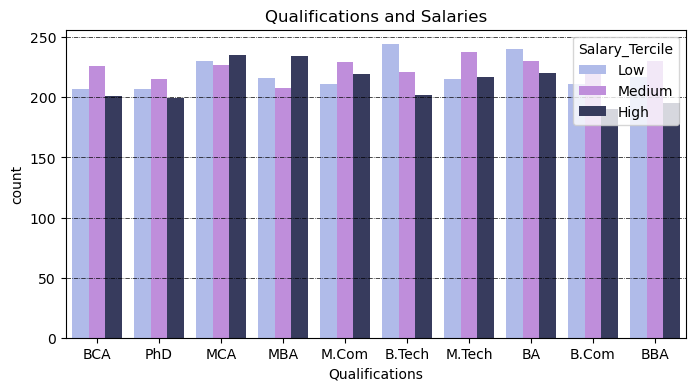

In [31]:
plot_count_pairs(bucharest_rows, feature='Qualifications', title='Qualifications and Salaries', hue='Salary_Tercile')